                        Mean   Median      Std Dev  Skewness  Kurtosis
Tenure Months      21.554981    16.00    18.941719  0.789422 -0.457685
Monthly Charges    87.021194    86.00    11.198021  0.174469 -0.952775
Total Charges    1969.714544  1393.65  1838.216942  0.965897  0.012325


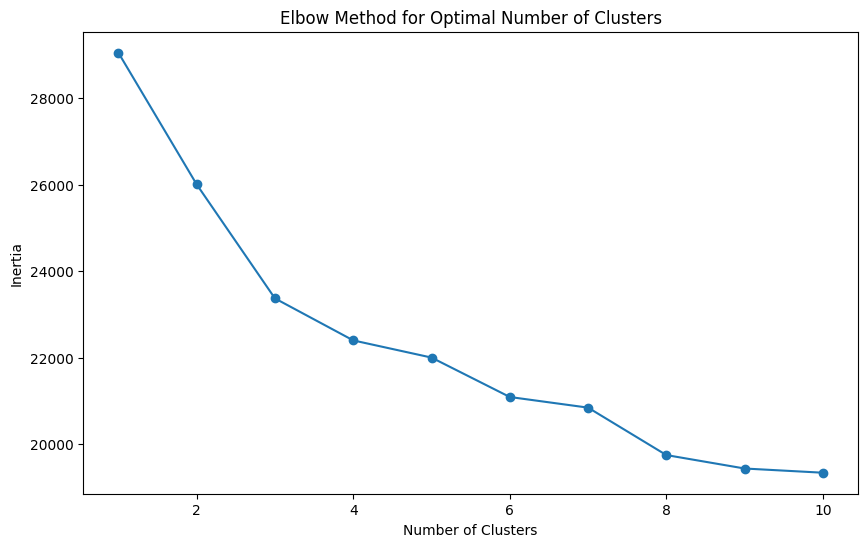

Cluster predictions: Cluster
1    434
2    291
3    278
0    159
Name: count, dtype: int64


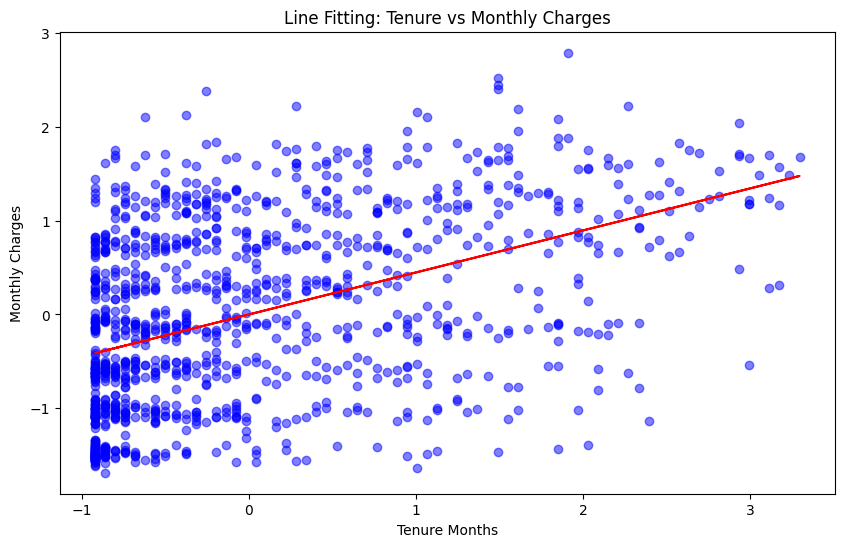

Predictions for new data points (tenure): [10 20 30]
Predicted monthly charges: [ 4.48115793  8.96231585 13.44347378]


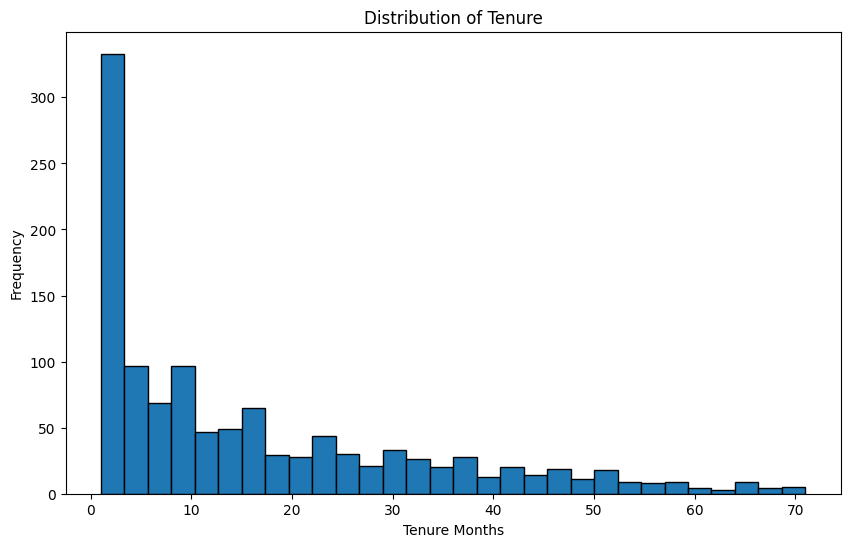

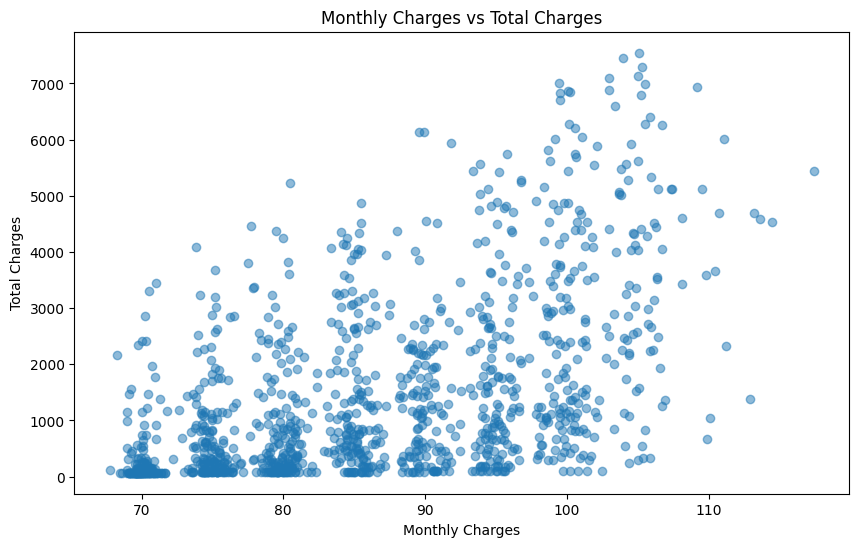

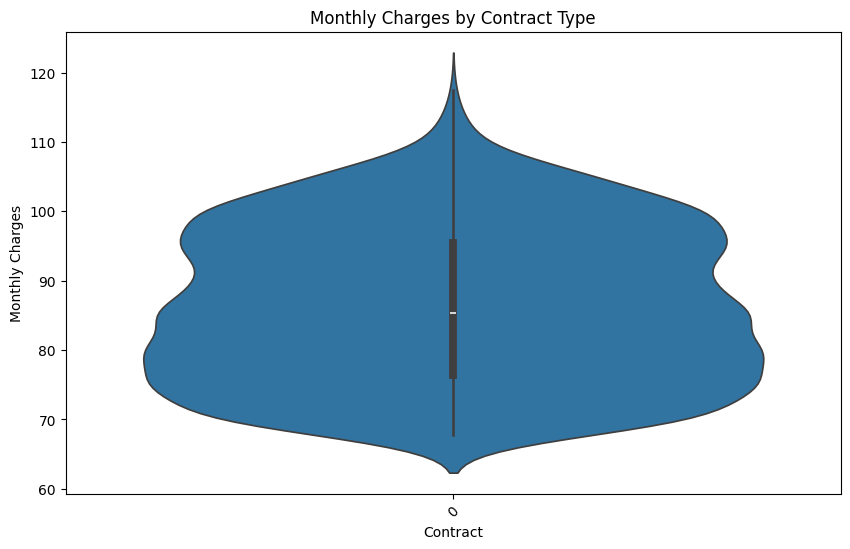

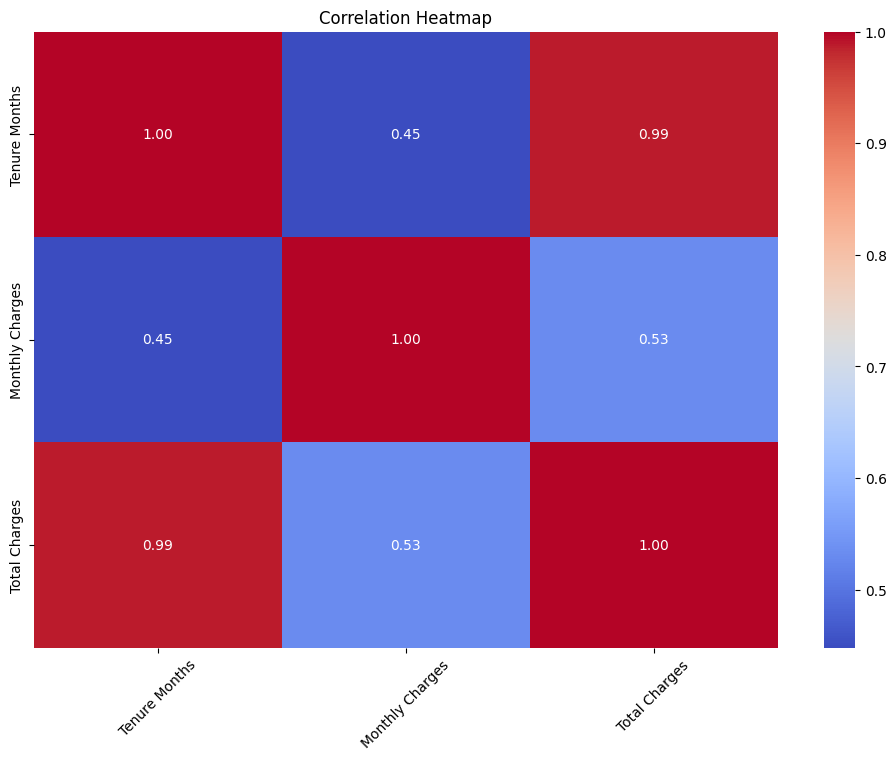

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data(file_path):
    """
    Load the dataset from a CSV file.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    DataFrame: The loaded dataset.
    """
    df = pd.read_csv(file_path)
    return df

# Preprocess the data
def preprocess_data(df):
    """
    Preprocess the dataset by handling missing values, encoding categorical variables, and normalizing the data.
    
    Parameters:
    df (DataFrame): The input dataset.
    
    Returns:
    DataFrame: The preprocessed dataset.
    """
    df.dropna(inplace=True)
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
    return df_scaled

# Display statistics
def display_statistics(df):
    """
    Display descriptive statistics for the dataset including mean, median, standard deviation, skewness, and kurtosis.
    
    Parameters:
    df (DataFrame): The input dataset.
    
    Returns:
    DataFrame: A dataframe containing the statistics.
    """
    important_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']
    statistics = {
        'Mean': df[important_columns].mean(),
        'Median': df[important_columns].median(),
        'Std Dev': df[important_columns].std(),
        'Skewness': df[important_columns].skew(),
        'Kurtosis': df[important_columns].kurtosis()
    }
    return pd.DataFrame(statistics)

# Fit KMeans model and predict clusters
def fit_kmeans(data, n_clusters):
    """
    Fit KMeans model and predict clusters.

    Parameters:
    data (DataFrame): The preprocessed dataset.
    n_clusters (int): The number of clusters to form.

    Returns:
    array: Cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.predict(data)

# Plot Elbow Method
def plot_elbow_method(data, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.
    
    Parameters:
    data (DataFrame): The preprocessed dataset.
    max_clusters (int): The maximum number of clusters to consider.
    """
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Fit and plot linear regression
def plot_line_fitting(data, x_column, y_column, title):
    """
    Fit a linear regression model and plot the results.

    Parameters:
    data (DataFrame): The preprocessed dataset.
    x_column (str): The name of the feature to use as the independent variable.
    y_column (str): The name of the feature to use as the dependent variable.
    title (str): The title of the plot.

    Returns:
    LinearRegression: The fitted linear regression model.
    """
    X = data[x_column].values.reshape(-1, 1)
    y = data[y_column].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5)
    plt.plot(X, y_pred, color='red')
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
    
    return model

# Plot histogram
def plot_histogram(data, column, title):
    """
    Plot a histogram for a specified column.
    
    Parameters:
    data (DataFrame): The input dataset.
    column (str): The name of the column to plot.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    data[column].plot(kind='hist', bins=30, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot scatter plot
def plot_scatter(data, x_column, y_column, title):
    """
    Plot a scatter plot for two specified columns.
    
    Parameters:
    data (DataFrame): The input dataset.
    x_column (str): The name of the feature to use as the x-axis.
    y_column (str): The name of the feature to use as the y-axis.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Plot violin plot
def plot_violin(data, x_column, y_column, title):
    """
    Plot a violin plot for a specified column.
    
    Parameters:
    data (DataFrame): The input dataset.
    x_column (str): The name of the feature to use as the x-axis.
    y_column (str): The name of the feature to use as the y-axis.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()

# Plot heatmap
def plot_heatmap(data, title):
    """
    Plot a heatmap of the correlation matrix of the dataset.
    
    Parameters:
    data (DataFrame): The input dataset.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Main function to execute all steps
def main():
    """
    Main function to load data, preprocess, perform clustering and fitting, 
    and create visualizations.
    """
    file_path = 'CustomerChurns.csv'
    df = load_data(file_path)
    
    if df is not None:
        # Display statistics
        statistics = display_statistics(df)
        print(statistics)

        # Adjust column names based on the dataset
        tenure_column = 'Tenure Months'
        monthly_charges_column = 'Monthly Charges'
        total_charges_column = 'Total Charges'
        contract_column = 'Contract'

        df_scaled = preprocess_data(df)

        # Plot Elbow Method
        plot_elbow_method(df_scaled)

        # Fit KMeans and predict clusters
        n_clusters = 4  # Based on elbow method
        cluster_labels = fit_kmeans(df_scaled, n_clusters)
        df['Cluster'] = cluster_labels
        print("Cluster predictions:", df['Cluster'].value_counts())

        # Line fitting
        model = plot_line_fitting(df_scaled, tenure_column, monthly_charges_column, 'Line Fitting: Tenure vs Monthly Charges')
        
        # Predictions using the fitted line
        new_data = np.array([[10], [20], [30]])  # Example new data points for tenure
        predictions = model.predict(new_data)
        print("Predictions for new data points (tenure):", new_data.flatten())
        print("Predicted monthly charges:", predictions)

        # Plot histogram
        plot_histogram(df, tenure_column, 'Distribution of Tenure')

        # Plot scatter plot
        plot_scatter(df, monthly_charges_column, total_charges_column, 'Monthly Charges vs Total Charges')

        # Plot violin plot
        plot_violin(df, contract_column, monthly_charges_column, 'Monthly Charges by Contract Type')

        # Plot heatmap
        important_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']
        plot_heatmap(df[important_columns], 'Correlation Heatmap')

if __name__ == "__main__":
    main()
